### Problem Description

Abalone Case Study

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Exploratory Data Analysis

In [4]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


Lets check the null values without using visualization¶

In [7]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
data.shape

(4177, 9)

In [9]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

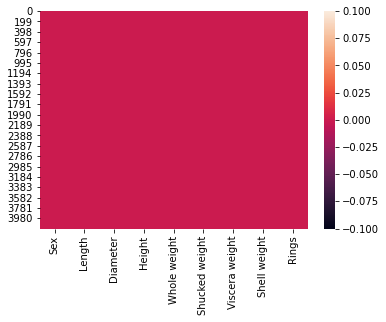

In [10]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [11]:
data = pd.DataFrame(data=data)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [12]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [13]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [15]:
#For the column who has 3 attributes
from sklearn import preprocessing
for col in data.columns:
    if(len(data[col].value_counts()) ==3):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[col] = le_anima.fit_transform(data[col])

In [16]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [17]:
dfcor = data.corr()
dfcor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

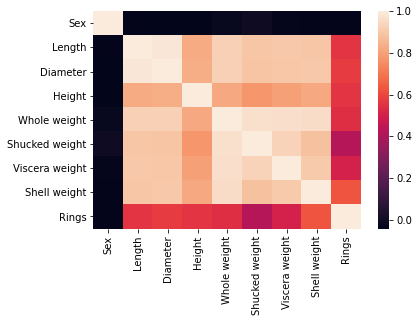

In [18]:
sns.heatmap(dfcor)

<AxesSubplot:>

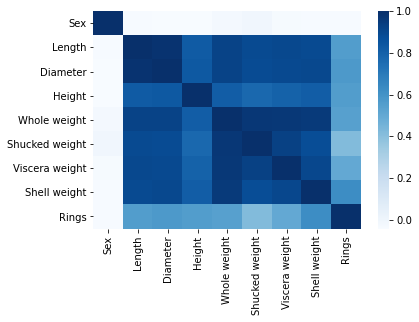

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=False)

<AxesSubplot:>

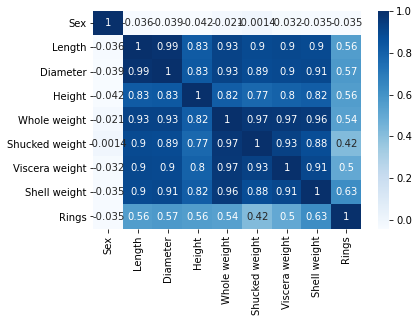

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

There is a Low Correlation Between Sex and Other Columns So we are Deleting this Column¶


In [21]:
data.drop(['Sex'],axis=1,inplace=True)

In [22]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Removing the Outliers¶

In [23]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(4177, 8)
(4027, 8)


## Checking Skewness and Removing it¶

In [24]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [25]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [26]:
#Lets Again Check the Skewness
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            1.099602
Whole weight      0.530959
Shucked weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
Rings            -0.061317
dtype: float64

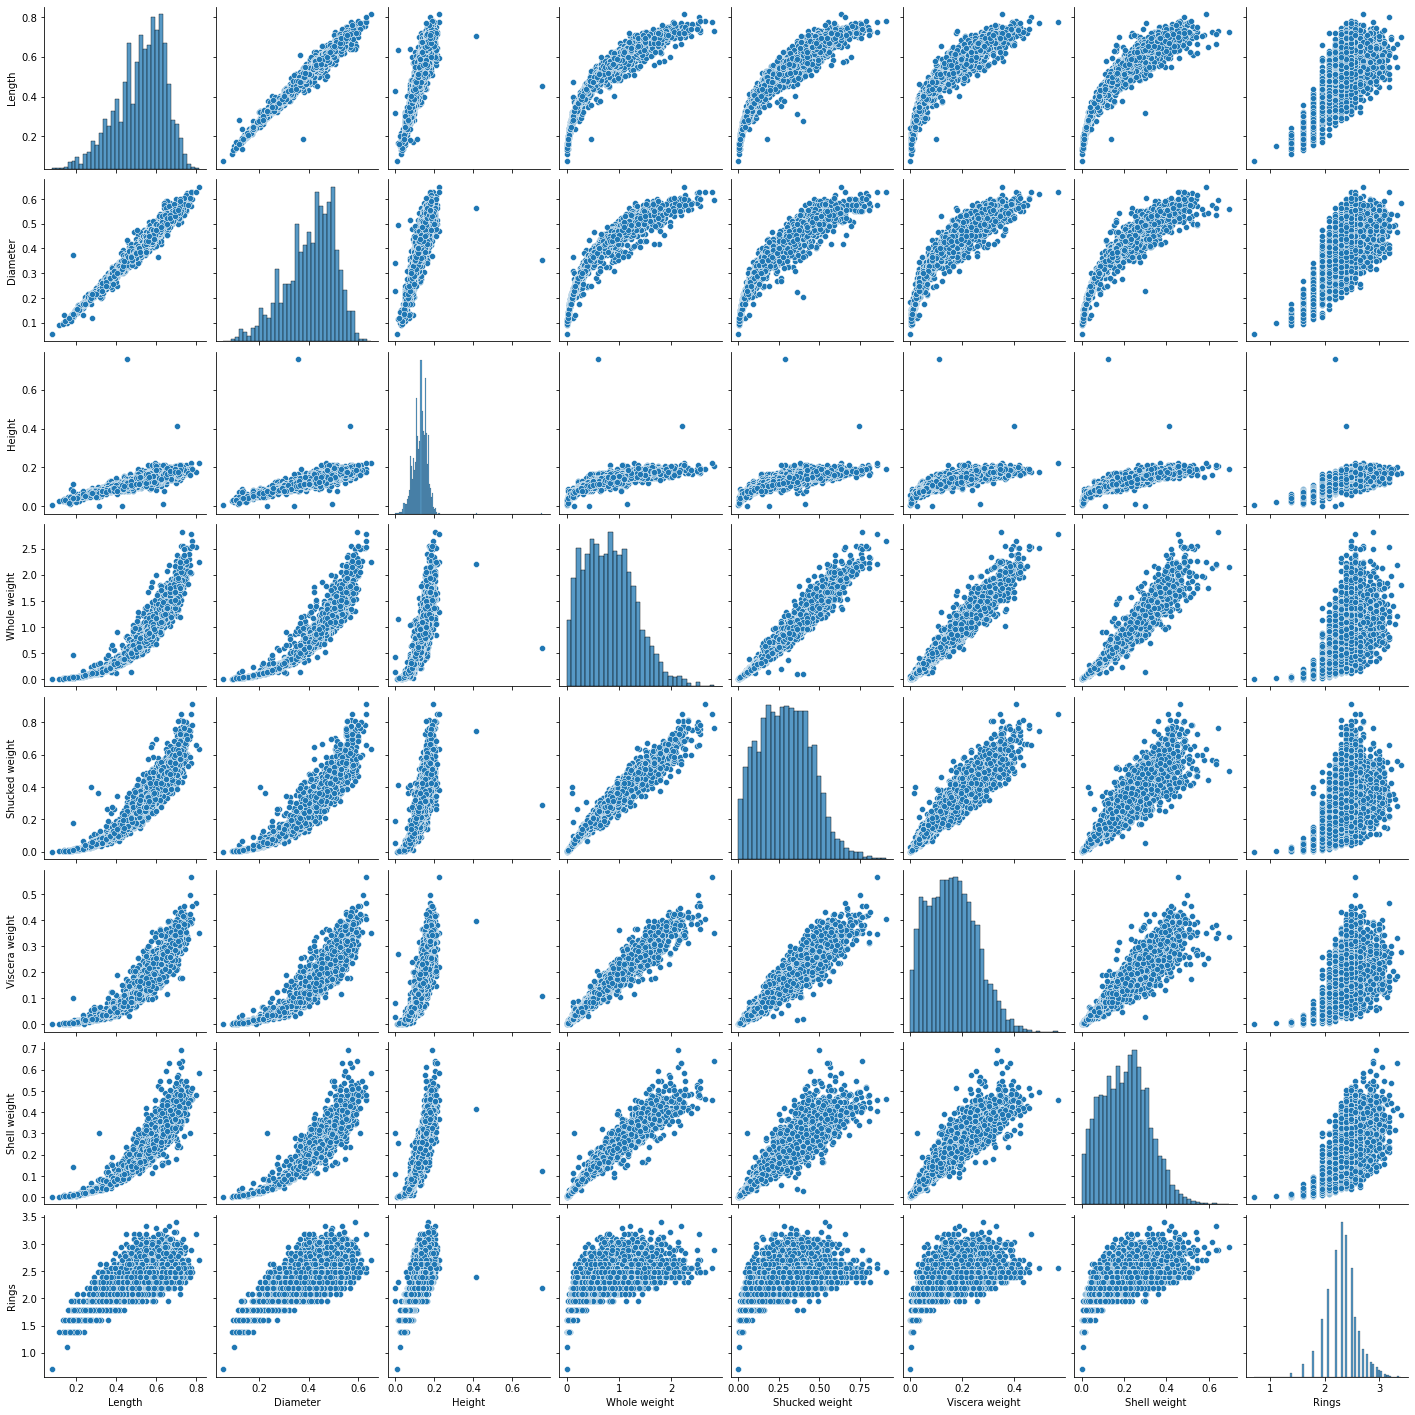

In [27]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

###### Plotting Boxplot through Iteration

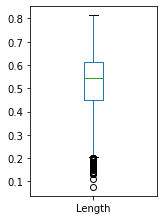

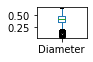

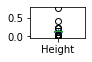

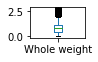

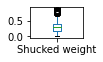

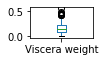

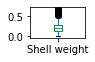

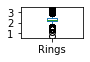

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

## Plotting Displot Through Iteration¶

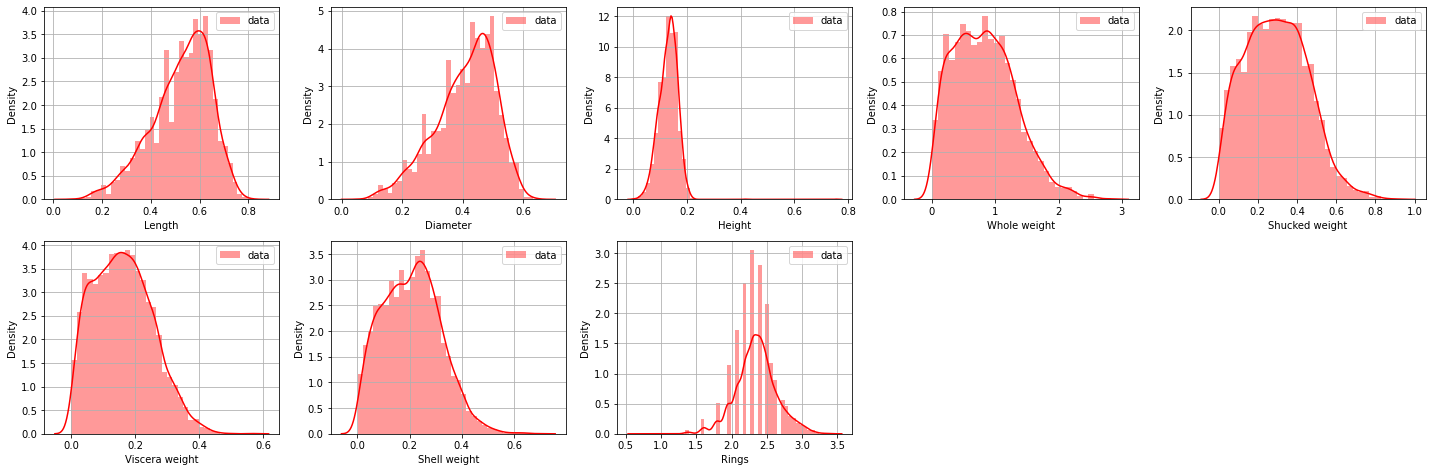

In [29]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [30]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

### Plotting Data using scatter plot¶

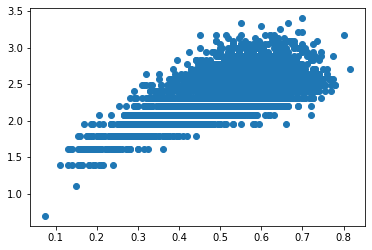

In [31]:
plt.scatter(data['Length'],data['Rings'])

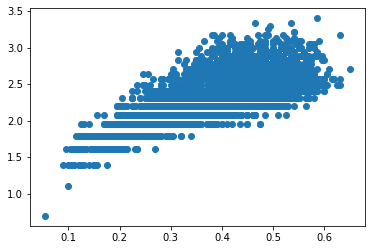

In [32]:
plt.scatter(data['Diameter'],data['Rings'])

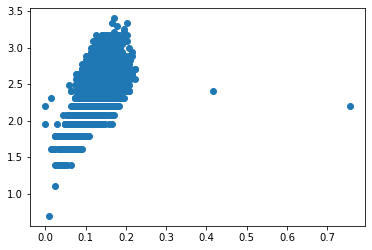

In [33]:
plt.scatter(data['Height'],data['Rings'])

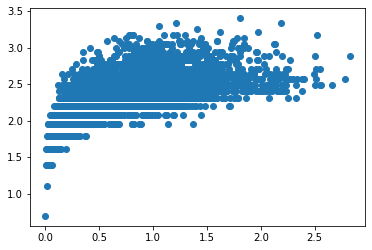

In [34]:
plt.scatter(data['Whole weight'],data['Rings'])

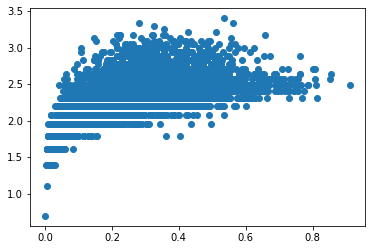

In [35]:
plt.scatter(data['Shucked weight'],data['Rings'])

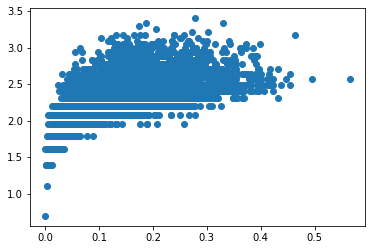

In [36]:
plt.scatter(data['Viscera weight'],data['Rings'])

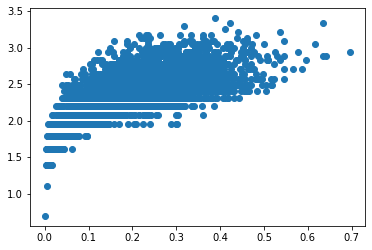

In [37]:
plt.scatter(data['Shell weight'],data['Rings'])

#### Column Plot


In [38]:
collist = data.columns.values
ncols=12
nrows=10

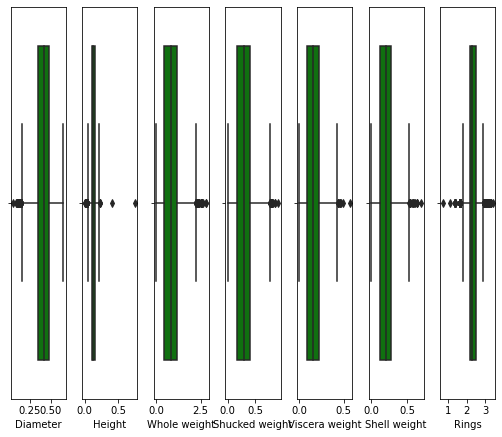

In [39]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

## Separating X and Y Variable¶

In [40]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.090754,0.5140,0.202533,0.096219,0.139762,2.772589
1,0.350,0.265,0.086178,0.2255,0.094856,0.047361,0.067659,2.079442
2,0.530,0.420,0.126633,0.6770,0.228330,0.132343,0.190620,2.302585
3,0.440,0.365,0.117783,0.5160,0.195156,0.107957,0.144100,2.397895
4,0.330,0.255,0.076961,0.2050,0.085719,0.038740,0.053541,2.079442
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.152721,0.8870,0.314811,0.214305,0.222343,2.484907
4173,0.590,0.440,0.126633,0.9660,0.363948,0.194332,0.231508,2.397895
4174,0.600,0.475,0.186480,1.1760,0.422322,0.252702,0.268499,2.302585
4175,0.625,0.485,0.139762,1.0945,0.425921,0.231905,0.259283,2.397895


In [41]:
X = data.drop("Rings", axis=1)


In [42]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.090754,0.5140,0.202533,0.096219,0.139762
1,0.350,0.265,0.086178,0.2255,0.094856,0.047361,0.067659
2,0.530,0.420,0.126633,0.6770,0.228330,0.132343,0.190620
3,0.440,0.365,0.117783,0.5160,0.195156,0.107957,0.144100
4,0.330,0.255,0.076961,0.2050,0.085719,0.038740,0.053541
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.152721,0.8870,0.314811,0.214305,0.222343
4173,0.590,0.440,0.126633,0.9660,0.363948,0.194332,0.231508
4174,0.600,0.475,0.186480,1.1760,0.422322,0.252702,0.268499
4175,0.625,0.485,0.139762,1.0945,0.425921,0.231905,0.259283


In [43]:
Y = data["Rings"]
Y

0       2.772589
1       2.079442
2       2.302585
3       2.397895
4       2.079442
          ...   
4172    2.484907
4173    2.397895
4174    2.302585
4175    2.397895
4176    2.564949
Name: Rings, Length: 4177, dtype: float64

In [44]:
X.shape

(4177, 7)

In [45]:
Y.shape

(4177,)

In [46]:
Y = Y.values.reshape(-1,1)

In [47]:
Y

array([[2.77258872],
       [2.07944154],
       [2.30258509],
       ...,
       [2.30258509],
       [2.39789527],
       [2.56494936]])

In [48]:
Y.shape

(4177, 1)

###### Applying Linear Regression

In [49]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [50]:
train_X.shape

(2798, 7)

In [51]:
train_Y.shape

(2798, 1)

In [52]:
test_X.shape

(1379, 7)

In [53]:
test_Y.shape

(1379, 1)

In [56]:
lg = LinearRegression()

In [57]:
lg.fit(train_X,train_Y)

LinearRegression()

In [58]:
lg.coef_

array([[ 0.53702417,  1.44128145,  2.67510389,  0.28772271, -2.02706646,
        -0.55912085,  1.15763035]])

In [59]:
lg.intercept_

array([1.34528761])

In [60]:
lg.score(train_X,train_Y)

0.6007143033923902

In [61]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[2.71093697]
 [2.17755175]
 [2.47974441]
 ...
 [2.35705836]
 [2.80331309]
 [2.45113362]]
actual price [[2.63905733]
 [2.30258509]
 [2.30258509]
 ...
 [2.39789527]
 [2.7080502 ]
 [2.7080502 ]]


In [62]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.1402848148753269
Mean sqaured error: 0.03315145106789926
Root mean squared error: 0.182075399403377


##### Boost through GradientBoostRegressor By using Parameters¶

In [63]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.7188172026461963
Mean squared error: 0.03
R2 Score: 0.61


###### Lets Visualize the Goodness of the Prediction¶


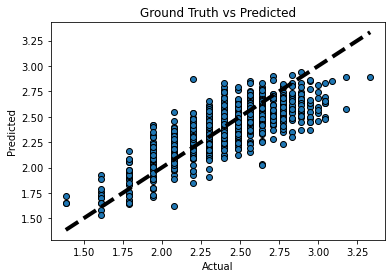

In [65]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

##### Linear Regression using Recursion¶

In [66]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [68]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.5976886350552191
r2 score corresponding to  43 is 0.6170167483993519
r2 score corresponding to  44 is 0.5925600787329885
r2 score corresponding to  45 is 0.5700658126542371
r2 score corresponding to  46 is 0.5983727145384545
r2 score corresponding to  47 is 0.5021850216390957
r2 score corresponding to  48 is 0.5979230815711438
r2 score corresponding to  49 is 0.5687226409441204
r2 score corresponding to  50 is 0.5555280421990438
r2 score corresponding to  51 is 0.5764741880809247
r2 score corresponding to  52 is 0.594135318899502
r2 score corresponding to  53 is 0.6075300555297161
r2 score corresponding to  54 is 0.553961167060991
r2 score corresponding to  55 is 0.5788644749512663
r2 score corresponding to  56 is 0.5544152202276209
r2 score corresponding to  57 is 0.5536109272389671
r2 score corresponding to  58 is 0.5946049707526191
r2 score corresponding to  59 is 0.5738662559219516
r2 score corresponding to  60 is 0.5612867349492441
r2 score corre

###### KNN Model

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 0.03
R2 Score of linear svc: 0.58


###### Lets use grid_search to find optimal value of n_neighbors for KNN Model¶

In [70]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 19}

In [71]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=19)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.6418420907593807
r2 score corresponding to  43 is 0.6542719595387725
r2 score corresponding to  44 is 0.6260068174464993
r2 score corresponding to  45 is 0.6156400673028983
r2 score corresponding to  46 is 0.644372520758586
r2 score corresponding to  47 is 0.5949196680379811
r2 score corresponding to  48 is 0.6405535753677405
r2 score corresponding to  49 is 0.6190904383255396
r2 score corresponding to  50 is 0.6252235146167211
r2 score corresponding to  51 is 0.6418278226437542
r2 score corresponding to  52 is 0.6326281133082986
r2 score corresponding to  53 is 0.6348863908905589
r2 score corresponding to  54 is 0.6043040665838983
r2 score corresponding to  55 is 0.6277228544084057
r2 score corresponding to  56 is 0.6244353344555738
r2 score corresponding to  57 is 0.6233263238585405
r2 score corresponding to  58 is 0.6456067926989425
r2 score corresponding to  59 is 0.6410883619091612
r2 score corresponding to  60 is 0.6281224833879953
r2 score corr

In [72]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.506164076754331
Standard deviation in r2 scorefor Linear Regression: 0.0636164452714653

Mean r2 score for KNN Regression:  0.5689918352039645
Stadard deviation in r2 score for KNN Regression: 0.05443102952911815


###### Boosting Linear Regression¶

In [73]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.409973686875636
Standard deviation in r2 score for ada boosting Regression:  0.1895826687383844


###### Boosting KNN model¶

In [74]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.37476560279981397
Standard deviation in r2 score for ada boosting Regression:  0.2242120031630166


###### Lets check lasso regression and best value of alpha¶


In [75]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [76]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.4690745170325078
Standard deviation in r2 score for Lasso Regression:  0.07753339152041636


###### Boosting Lasso Regressor¶

In [77]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.37990755667125475
Standard deviation in r2 score for ada boosting Regression:  0.23221033986741985


###### Support Vector Regression¶

In [78]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))


svr2 = SVR(kernel = "poly")
svr2.fit(train_X,train_Y)
svr2.score(train_X,train_Y)
y_pred2=svr2.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred2))
print('R2 Score of poly svc: %.2f' % r2_score(test_Y, y_pred2))


svr3 = SVR(kernel = "rbf")
svr3.fit(train_X,train_Y)
svr3.score(train_X,train_Y)
y_pred3=svr3.predict(test_X)
print("Mean squared error of rbf svc: %.2f"% mean_squared_error(test_Y,y_pred3))
print('R2 Score of rbf svc: %.2f' % r2_score(test_Y, y_pred3))

Mean squared error of linear svc: 0.03
R2 Score of linear svc: 0.58
Mean squared error of poly svc: 0.03
R2 Score of poly svc: 0.53
Mean squared error of rbf svc: 0.03
R2 Score of rbf svc: 0.64


###### Grid Search CV in Support Vector Regressor¶

In [79]:
from sklearn.svm import SVR
import numpy as np
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
grs = GridSearchCV(svr, parameters,refit = True, verbose = 3)
grs.fit(X,Y)
grs.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.450, total=   0.2s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.446, total=   0.2s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.532, total=   0.2s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.593, total=   0.2s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear ..................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=linear, score=0.546, total=   0.2s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.211, total=   0.2s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.471, total=   0.3s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.129, total=   0.3s
[CV] C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf .....................
[CV]  C=1.5, epsilon=0.1, gamma=1e-07, kernel=rbf, score=-0.036, total=   0.3s
[CV] C=1.5, eps

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   33.5s finished


{'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

In [80]:
svr_grs=SVR(C=1.5, epsilon=0.1, gamma=1e-07, kernel='linear')
print("Mean r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(svr_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.5134759349180917
Standard deviation in r2 score for ada boosting Regression:  0.056910695581609785


###### Boosting Support Vector Machine¶

In [81]:
from sklearn.ensemble import AdaBoostRegressor

In [82]:
ada_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.391266937340898
Standard deviation in r2 score for ada boosting Regression:  0.20464080670778145


###### Decision Tree Regressor¶

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 0)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


###### Decision Tree Regressor Using GridSearchCV¶

In [84]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.5523033537385504
R-Squaredon test dataset=0.6010164485040345


In [85]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [86]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.5180335421016167
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 40, 'min_samples_split': 10}


###### Boosting Decision Tree¶

In [87]:
from sklearn.ensemble import AdaBoostRegressor

In [88]:
ada_reg5=AdaBoostRegressor()
add_reg5=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.48593653694746075
Standard deviation in r2 score for ada boosting Regression:  0.07162842462477978


###### Random Forest Regressor¶

In [89]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.04
R2 Score : 0.51


###### Random Forest Regressor with GridSearchCV

In [90]:
rf_gs = RandomForestRegressor(n_estimators=100)

In [91]:
n_features = X.shape[1]

In [92]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 3, 'max_depth': 10}


In [93]:
rf_gss = RandomForestRegressor(max_features = 3, max_depth = 9)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.5738735693084964
Standard deviation in r2 score for ada boosting Regression:  0.05565495082060913


###### Boosting RandomForestRegressor

In [94]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.556122412149343
Standard deviation in r2 score for ada boosting Regression:  0.05037330950309688


###### NOTE::Among all models,dtregressor gives the Highest r2 score(1) and mean squared error is zero so we are going to save this model¶

In [101]:
!pip install joblib

In [102]:
import joblib

In [104]:
#Save the model as pickle in a file
joblib.dump(dtregressor,'Abalone.pkl')

['Abalone.pkl']